# Assignment 8: Multiclass Classification Methods

### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


**Import Libraries**

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)

# EDA and Data Preprocessing

### About The Dataset

**The target feature is**
Drug type

**The feature sets are:**
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration


**Reading Dataset**

In [55]:
path = './drug.csv'
drugs = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [56]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


```df.info()``` shows that we have no NaN value.

In [57]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Check Null values (We don't have any null values)

In [58]:
drugs.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Checking for duplicate rows, we dont have any duplicated row

In [59]:
drugs[drugs.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


We take a look to diffrent values for some columns

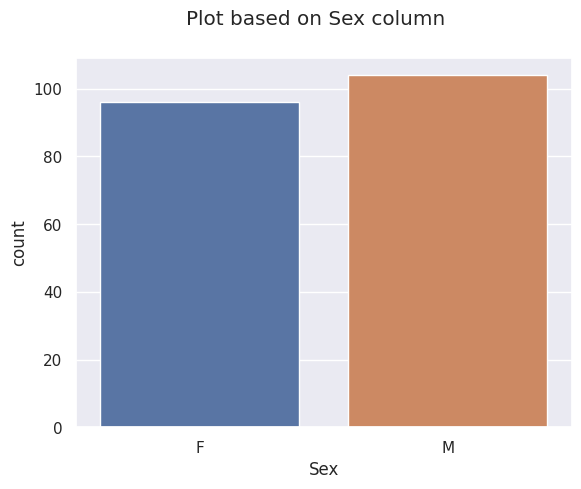

In [60]:
sns.countplot(data=drugs, x="Sex")
plt.suptitle('Plot based on Sex column')
plt.show()

We have 5 different kind of drugs in this dataset, So There are 5 classes to classify:

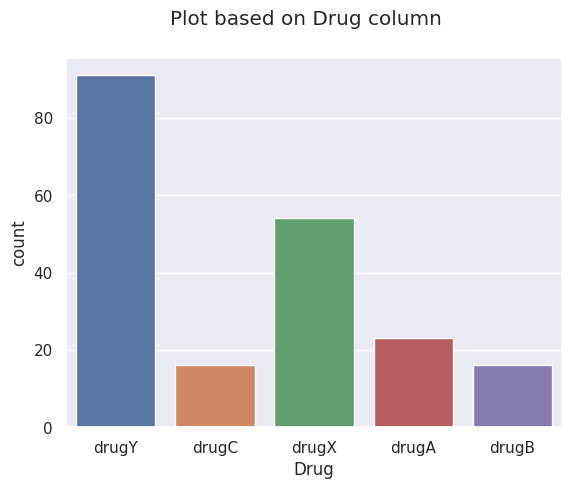

In [61]:
sns.countplot(data=drugs, x="Drug")
plt.suptitle('Plot based on Drug column')
plt.show()

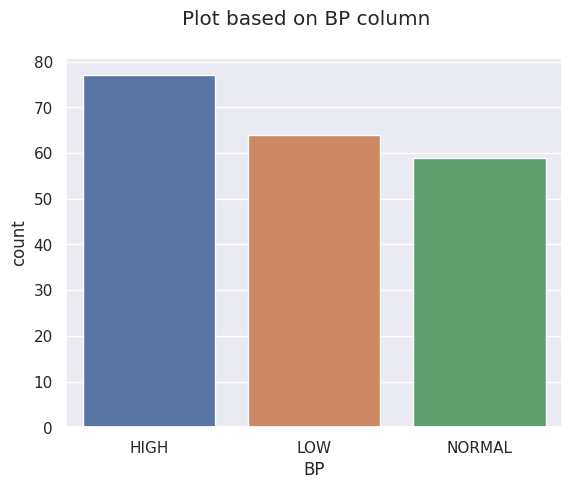

In [62]:
sns.countplot(data=drugs, x="BP")
plt.suptitle('Plot based on BP column')
plt.show()

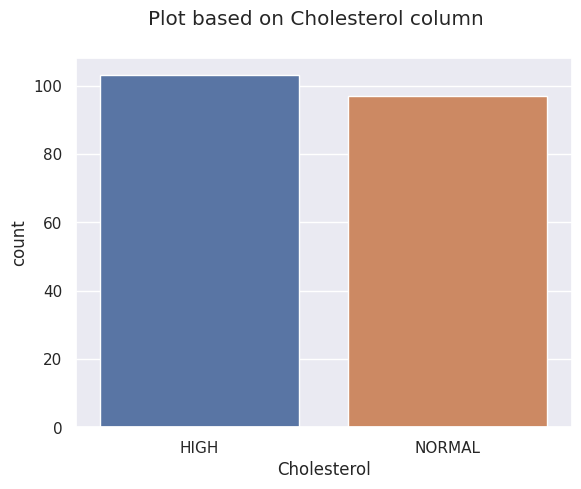

In [63]:
sns.countplot(data=drugs, x="Cholesterol")
plt.suptitle('Plot based on Cholesterol column')
plt.show()

Using <b>drugs</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of drugs) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [64]:
X = drugs[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

Some features in this dataset are categorical, such as **Sex** or **BP**.

Sklearn Decision Trees does not handle categorical variables.

We Use Label Encode for covert these feature to numerical values.


In [65]:
le_sex = LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

Now , all of our data is numerical

In [66]:
X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

Now we can fill the target variable.


In [67]:
y = drugs["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object



**Spliting Dataset**


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now it's time to train models! We know that the minimum for f1-score is $\frac{2.5}{number of classes}$. There are 5 classes here so the threshold will be $\frac{2.5}{5}=0.5$.

# Multiclass SVM

The first model we try is SVM. Here we use linear kernel and our decision function shape is ovr. C is regularization parameter. The strength of the regularization is inversely proportional to C:

In [69]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='linear',decision_function_shape = "ovr",max_iter=5000, random_state=42)
model.fit(X_train, y_train)

SVC(C=2, kernel='linear', max_iter=5000, random_state=42)

In [70]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [71]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 1.00
Macro F1-score on Train is 1.00


# Multiclass Logistic Regression

Now we will try logistic regression model with different strategies to handle the multi class problem:

## OVR technique

Here the chosen option for multi class is ovr. So a binary problem is fit for each label. Penalty is set to None so we don't have any regularization:

In [72]:
from sklearn.linear_model import LogisticRegression
model_ovr = LogisticRegression(penalty='none',max_iter=400,multi_class='ovr', random_state=42)
model_ovr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, multi_class='ovr', penalty='none',
                   random_state=42)

In [73]:
test_pred = model_ovr.predict(X_test)
train_pred = model_ovr.predict(X_train)

In [74]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 0.76
Macro F1-score on Train is 0.99


## Multinomial Approach

For multinomial the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary:

In [75]:
model_mult = LogisticRegression(max_iter=700,multi_class='multinomial', random_state=42)
model_mult.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=700, multi_class='multinomial', random_state=42)

In [76]:
test_pred = model_mult.predict(X_test)
train_pred = model_mult.predict(X_train)

In [77]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 0.90
Macro F1-score on Train is 0.93


##  Log-loss for the output

Now we can compute log-loss for the model output. In the multi-class problem, the log-loss has this formula:

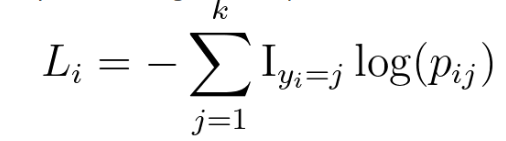

In [78]:
from sklearn.metrics import log_loss
# predict probablity of classes for test set
prob_mult = model_mult.predict_proba(X_test)

# compute log loss
mult_loss = log_loss(y_test, prob_mult)
print('Log Loss For Multinomial: %.2f' %mult_loss)

Log Loss For Multinomial: 0.23


# Multiclass KNN

## Algorithm Implementation

KNN is the next model! We set the number of neighbors to 3 and the weight function we used is distance. It weights points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away:

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [80]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [81]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 0.71
Macro F1-score on Train is 1.00


## Tune for best number of neighbors (K)

We aim to find the best value for number of neighbors. The best value for it is 3 that we set for our model. After that we have a descending trend overall but sometimes it goes up. When number of neighbors reaches to 30, we won't have special change in f1-score:

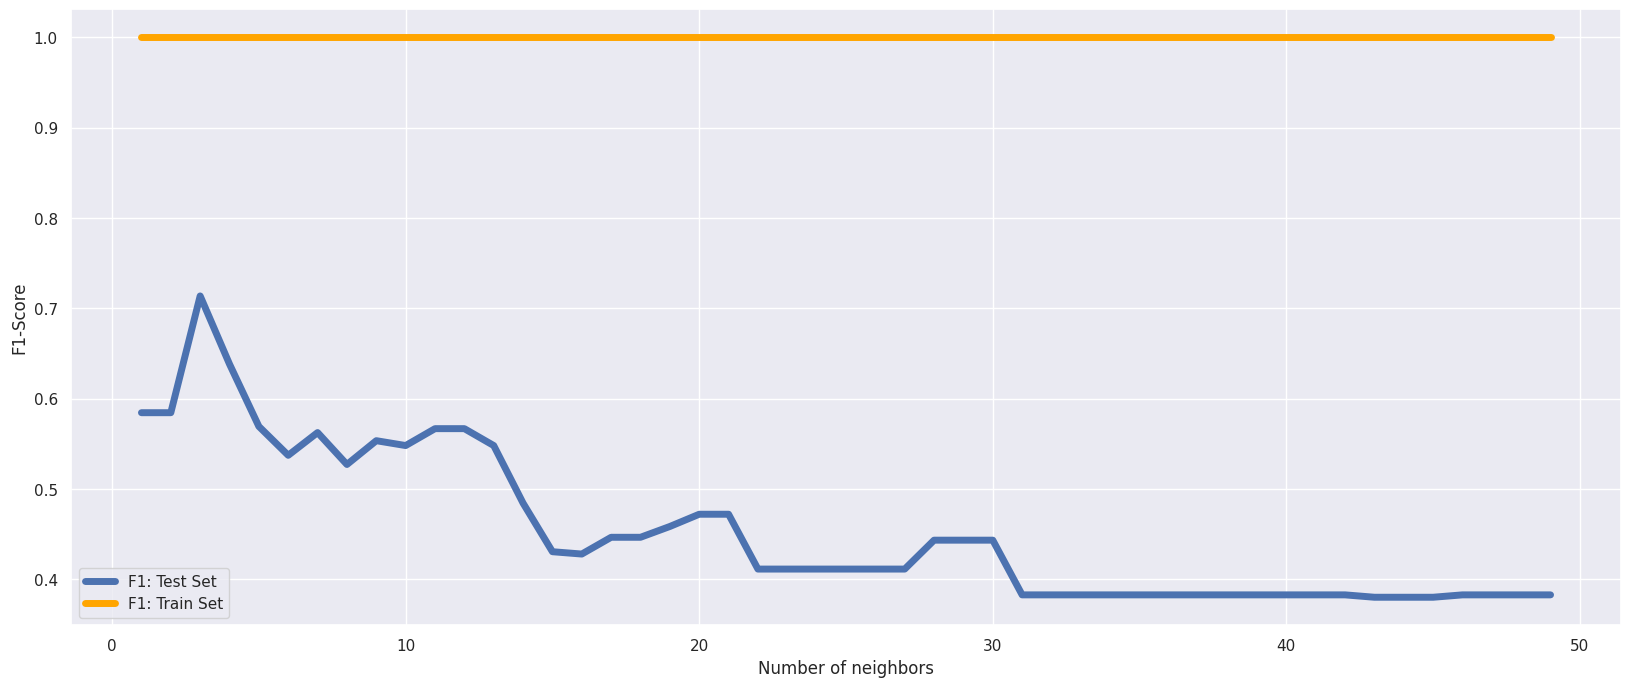

In [82]:
scores = []
neighbors_list = np.arange(1,50)
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n, weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=5)
plt.plot(neighbors_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


# Multiclass Decision Trees

For decision tree, we set criterion to gini. This parameter determines how the impurity of a split will be measured:

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [84]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [85]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 1.00
Macro F1-score on Train is 1.00


# Boosting Techniques

In this dection, we try different boosting methods. These methods are examples of ensemble learning. For this purpose, firstly we should convert the class labels to numerical format:

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

##  XGBoost

The first boosting method is XGBoost. XGBoost is the combination of these items: GBM(Gradient Boosting Machine) + Regularization + Parallel processing:

In [87]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train,eval_metric=f1_score)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [89]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 0.97
Macro F1-score on Train is 1.00


## LightGBM

LightGBM is another variant of boosting methods. It is the GBM designed for large data:

In [90]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.01, random_state=42)
model.fit(X_train,y_train,eval_metric=f1_score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 5
[LightGBM] [Info] Start training from score -2.241960
[LightGBM] [Info] Start training from score -2.510224
[LightGBM] [Info] Start training from score -2.677279
[LightGBM] [Info] Start training from score -1.313974
[LightGBM] [Info] Start training from score -0.744440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(learning_rate=0.01, random_state=42)

In [91]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [92]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 0.97
Macro F1-score on Train is 1.00


## Adaboost or Catboost

 Catboost is the last boosting method. The noticeable point about is is faster prediction time:

In [93]:
!pip install catboost

In [94]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.072066
0:	learn: 1.5266793	total: 1.73ms	remaining: 1.73s
1:	learn: 1.4737251	total: 3.24ms	remaining: 1.62s
2:	learn: 1.3625653	total: 4.26ms	remaining: 1.41s
3:	learn: 1.2834890	total: 5.27ms	remaining: 1.31s
4:	learn: 1.1875820	total: 5.84ms	remaining: 1.16s
5:	learn: 1.1181477	total: 6.56ms	remaining: 1.09s
6:	learn: 1.0719729	total: 8.1ms	remaining: 1.15s
7:	learn: 1.0224125	total: 9.76ms	remaining: 1.21s
8:	learn: 0.9739873	total: 11.3ms	remaining: 1.25s
9:	learn: 0.9282998	total: 13.1ms	remaining: 1.3s
10:	learn: 0.8979858	total: 14.7ms	remaining: 1.32s
11:	learn: 0.8633226	total: 16.1ms	remaining: 1.32s
12:	learn: 0.8247658	total: 17.7ms	remaining: 1.35s
13:	learn: 0.7941827	total: 19.2ms	remaining: 1.35s
14:	learn: 0.7606624	total: 20.7ms	remaining: 1.36s
15:	learn: 0.7341305	total: 22.2ms	remaining: 1.37s
16:	learn: 0.7107947	total: 23.7ms	remaining: 1.37s
17:	learn: 0.6851331	total: 24.7ms	remaining: 1.34s
18:	learn: 0.6666021	total: 26.2ms	remaining: 

In [95]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [96]:
from sklearn.metrics import f1_score
print('Macro F1-score on Test is %.2f' %f1_score(y_test, test_pred, average='macro'))
print('Macro F1-score on Train is %.2f' %f1_score(y_train, train_pred, average='macro'))

Macro F1-score on Test is 1.00
Macro F1-score on Train is 1.00


## Grid search to tune one of the boosting methods above

We apply grid search to XGBoost. There are several parameters that we can optimize:


*   eta or learning rate
*   max depth of tree
*   subsample is the fraction of the data which is sampled and given to each tree
*   colsample_bytree determines fraction of features we want to use to construct each tree
* gamma is the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.


In RandomizedSearchCV, we set refit to AUC. the refit of an estimator determines the best found parameters on the whole dataset:

In [97]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()

param_grid = {
    "eta": [0.1, 0.01],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2,5,10],
    "n_estimators": [50,100, 150, 200],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

n_iter=50
grid = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
)

best_model = grid.fit(X_train,y_train)

Here you can find some of the best parameters for XGBoost:

In [98]:
print('Max depth is: %d ' %best_model.best_estimator_.max_depth)
print('Gamma is: %.2f '  %best_model.best_estimator_.gamma)
print('subsample is: %.2f '  %best_model.best_estimator_.subsample)

Max depth is: 2 
Gamma is: 0.10 
subsample is: 1.00 


# Explain how KNN and decision trees can be extended to multi-label classification problems

Both K-nearest neighbor (KNN) and decision trees can be extended to handle multi-label classification problems. Here's how:

**K-Nearest Neighbor (KNN)**

The traditional KNN algorithm is designed for single-label classification, where each instance belongs to one and only one class. In multi-label classification, each instance can belong to multiple classes simultaneously. To adapt KNN for multi-label classification, the following modifications are made:

1. **Label Set Prediction:** Instead of predicting a single label, KNN predicts a label set for each instance. This is done by considering the label sets of the k nearest neighbors and assigning the most frequent labels to the new instance.

2. **Distance Metric:** The distance metric used to find nearest neighbors needs to be adapted to handle multi-label data. Some common distance metrics for multi-label KNN include Hamming distance, Jaccard similarity, and Label Powerset distance.

**Decision Trees**

Decision trees can also be extended to handle multi-label classification by modifying the splitting criterion. The traditional information gain or gain ratio criterion is not suitable for multi-label data, as it assumes that labels are mutually exclusive. Instead, alternative splitting criteria, such as the maximum F1-score or the maximum multi-label classification accuracy, can be used.

Here's a summary of the extensions for each algorithm:

| Algorithm | Extension for Multi-Label Classification |
|---|---|
| KNN | Predict a label set, use multi-label distance metrics |
| Decision Trees | Modify splitting criterion for multi-label data |

